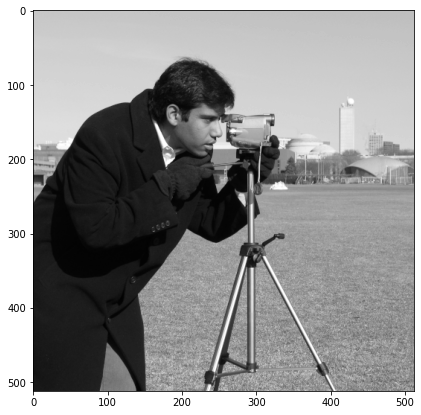

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D

from skimage import data
import matplotlib.pyplot as plt

image = data.camera()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap='gray')

In [8]:
print(image.shape)
image = image[None, ..., None] # так тоже можно добавлять дополнительные размерности
print(image.shape)
image = image.astype(np.float32) / 255. # обязательно приводим к float

(512, 512)
(1, 512, 512, 1)


# Реализация фильтра для детектирования вертикальных линий

Input shape (1, 512, 512, 1). Output shape (1, 512, 512, 1)
Test passed


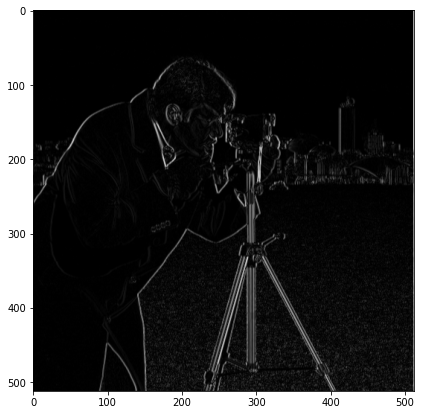

In [9]:
conv_layer = Conv2D(kernel_size=(3, 3), filters=1, use_bias=False, padding='same')
_ = conv_layer(image)

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
kernel = kernel.reshape((3, 3, 1, 1))
conv_layer.set_weights([kernel])
detected_lines = conv_layer(image)
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :, :, 0]), cmap='gray')
print(f'Input shape {image.shape}. Output shape {conv_layer(image).numpy().shape}')
assert image.shape == detected_lines.shape
print('Test passed')

# Повышение резкоти изображения без изменения его размера.

(1, 400, 600, 3)


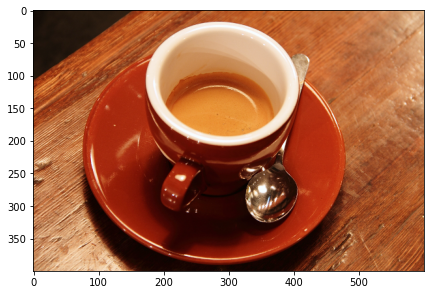

In [10]:
image = data.coffee()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap='gray')
image = image[None, ...].astype(np.float32) / 255.
print(image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape (1, 400, 600, 3). Output shape (1, 400, 600, 3)
Test passed


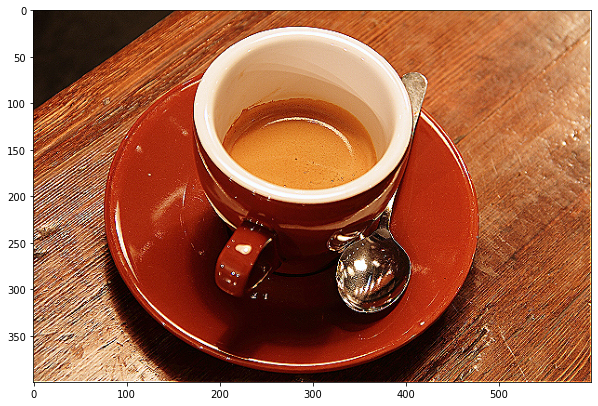

In [15]:
conv_layer = Conv2D(kernel_size=(3, 3), filters=3, padding='same', use_bias=False)
_ = conv_layer(image)

conv_layer.get_weights()[0].shape
kernel = np.zeros((3, 3, 3, 3))

sharpen_kernel_2d = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]]).astype(np.float32)

kernel[:, :, 0, 0] = sharpen_kernel_2d
kernel[:, :, 1, 1] = sharpen_kernel_2d
kernel[:, :, 2, 2] = sharpen_kernel_2d

conv_layer.set_weights([kernel])

sharpen_image = conv_layer(image).numpy()
plt.figure(figsize=(10, 10))
plt.imshow(sharpen_image[0])
print(f'Input shape {image.shape}. Output shape {sharpen_image.shape}')
assert image.shape == sharpen_image.shape
print('Test passed')